# Regresión lineal simple

In [9]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




data_of = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

data_de = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')


In [10]:
data_de.head()

,Date,demanda_diaria
0,2021-01-01,9.375536e+07
1,2021-01-02,9.804844e+07
2,2021-01-03,9.778708e+07
3,2021-01-04,1.039159e+08
4,2021-01-05,1.044716e+08


In [11]:
data_of.head()

,Date,oferta_diaria
0,2021-01-01,179502000.0
1,2021-01-02,179502000.0
2,2021-01-03,179502000.0
3,2021-01-04,179502000.0
4,2021-01-05,158622000.0


In [12]:
# División de los datos en conjunto de entrenamiento y prueba
X = data_de['demanda_diaria']
y = data_of['oferta_diaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)


In [16]:
# Asegurarse de que X_train, y_train y X_test sean matrices de 2 dimensiones
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# Creación del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 772503216085336.2
Coeficiente de determinación (R²): 0.06951024444070786


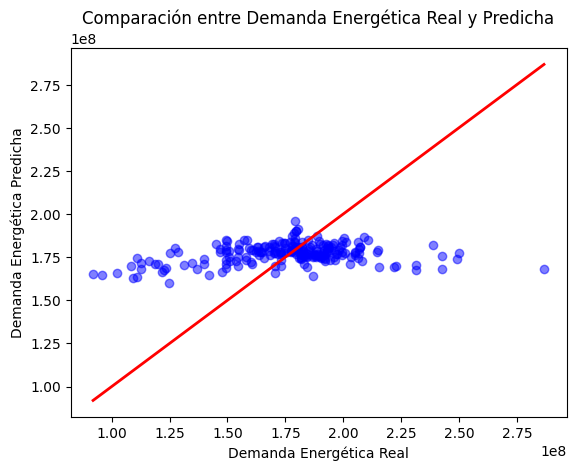

In [17]:
%matplotlib inline

# Visualización de los resultados
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Demanda Energética Real")
plt.ylabel("Demanda Energética Predicha")
plt.title("Comparación entre Demanda Energética Real y Predicha")
plt.show()

In [20]:
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# Datos de ejemplo (combina oferta y demanda)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')


# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Características y variable objetivo
X = data[['oferta_diaria']]
y = data['demanda_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos a probar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(kernel='rbf')
}

# Evaluación de modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados[nombre] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Mostrar resultados
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)

                            MAE           MSE        R2
Regresión Lineal   5.960339e+06  5.631244e+13  0.090689
Árbol de Decisión  6.600046e+06  7.229472e+13 -0.167387
Random Forest      5.704167e+06  5.331351e+13  0.139114
Gradient Boosting  5.297457e+06  4.579475e+13  0.260524
SVR                6.071814e+06  6.195187e+13 -0.000375


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Datos de ejemplo (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Crear nuevas características
data['diferencia_demanda'] = data['demanda_diaria'].diff().fillna(0)
data['media_movil_demanda'] = data['demanda_diaria'].rolling(window=3).mean().fillna(data['demanda_diaria'].mean())
data['lag_demanda'] = data['demanda_diaria'].shift(1).fillna(data['demanda_diaria'].mean())

# Características y variable objetivo
X = data[['oferta_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda']]
y = data['demanda_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('model', GradientBoostingRegressor())  # Modelo de Gradient Boosting
])

# Definir los hiperparámetros a buscar en GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.01, 0.1]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluación del modelo optimizado
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

Mejores Hiperparámetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
MAE: 728967.718857183
MSE: 1116382663007.502
R2: 0.9819730888126732


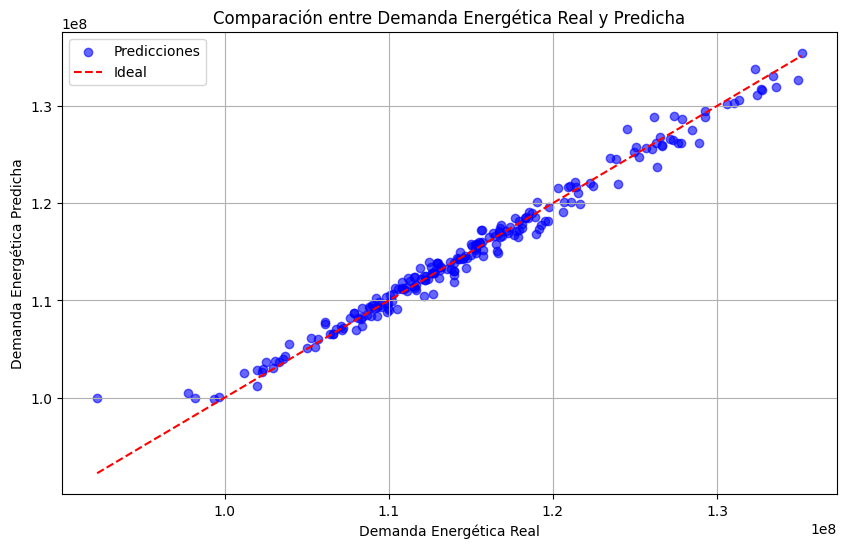

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predichos
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')

# Configuración del gráfico
plt.xlabel('Demanda Energética Real')
plt.ylabel('Demanda Energética Predicha')
plt.title('Comparación entre Demanda Energética Real y Predicha')
plt.legend()
plt.grid(True)
plt.show()

13:27:21 - cmdstanpy - INFO - Chain [1] start processing
13:27:22 - cmdstanpy - INFO - Chain [1] done processing


Predicción para 2025-12-30:
Demanda Estimada: 154477980.68
Intervalo de Confianza: [135832194.73, 172347395.51]


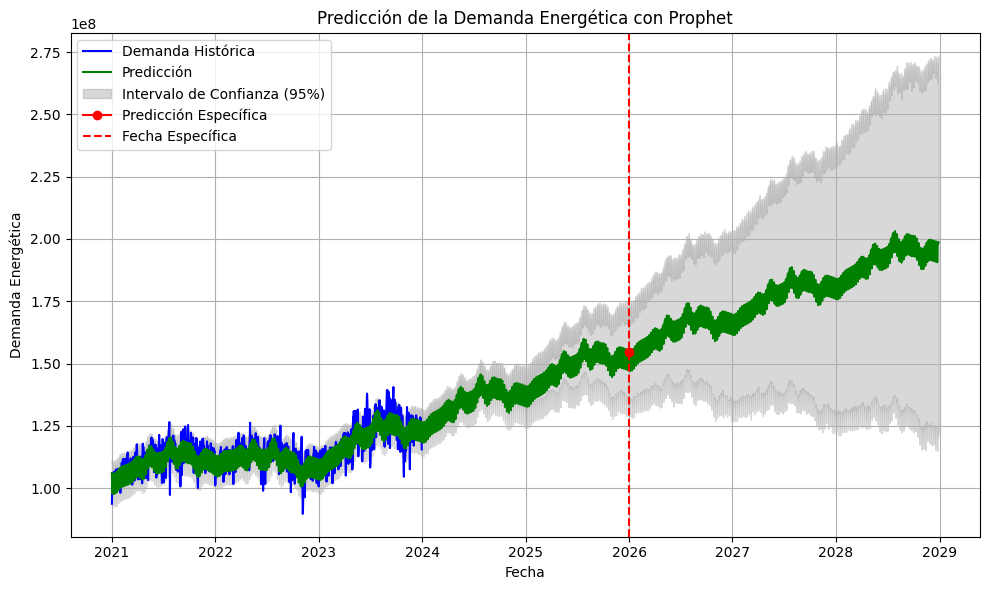

In [23]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna de fechas esté en el formato correcto
data['Date'] = pd.to_datetime(data['Date'])

# Preparar los datos para Prophet
data_prophet = data[['Date', 'demanda_diaria']].copy()
data_prophet.columns = ['ds', 'y']

# Crear y ajustar el modelo de Prophet
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_prophet.fit(data_prophet)

# Función para predecir la demanda en una fecha específica
def predecir_demanda(fecha_futura, anos_prediccion=5):
    """
    Genera la predicción de la demanda para una fecha futura específica.
    
    :param fecha_futura: Fecha a predecir (formato 'YYYY-MM-DD').
    :param anos_prediccion: Número de años para generar predicciones (default=5).
    """
    # Crear un DataFrame con las fechas a futuro (hasta el número de años especificado)
    dias_prediccion = 365 * anos_prediccion
    future = model_prophet.make_future_dataframe(periods=dias_prediccion)
    forecast = model_prophet.predict(future)
    
    # Buscar la predicción para la fecha dada
    prediccion = forecast[forecast['ds'] == fecha_futura]
    
    if not prediccion.empty:
        yhat = prediccion['yhat'].values[0]
        yhat_lower = prediccion['yhat_lower'].values[0]
        yhat_upper = prediccion['yhat_upper'].values[0]
        
        print(f"Predicción para {fecha_futura.date()}:")
        print(f"Demanda Estimada: {yhat:.2f}")
        print(f"Intervalo de Confianza: [{yhat_lower:.2f}, {yhat_upper:.2f}]")
        
        # Visualizar la predicción en el gráfico completo
        fig, ax = plt.subplots(figsize=(10, 6))

        # Graficar la demanda histórica
        ax.plot(data_prophet['ds'], data_prophet['y'], label='Demanda Histórica', color='blue')

        # Graficar la predicción
        ax.plot(forecast['ds'], forecast['yhat'], label='Predicción', color='green')

        # Graficar el intervalo de confianza
        ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                        color='gray', alpha=0.3, label='Intervalo de Confianza (95%)')

        # Destacar la predicción en la fecha especificada
        ax.plot(fecha_futura, yhat, marker='o', color='red', label='Predicción Específica')
        ax.axvline(pd.to_datetime(fecha_futura), color='red', linestyle='--', label='Fecha Específica')

        # Personalización del gráfico
        ax.set_title('Predicción de la Demanda Energética con Prophet')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Demanda Energética')
        ax.legend(loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        print(f"No se encontró una predicción para la fecha {fecha_futura}. Verifica si la fecha está dentro del rango de predicción.")

# Ejemplo de uso
fecha_futura = '2025-12-30'  # Reemplaza con la fecha deseada
predecir_demanda(pd.to_datetime(fecha_futura), anos_prediccion=5)



C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packa

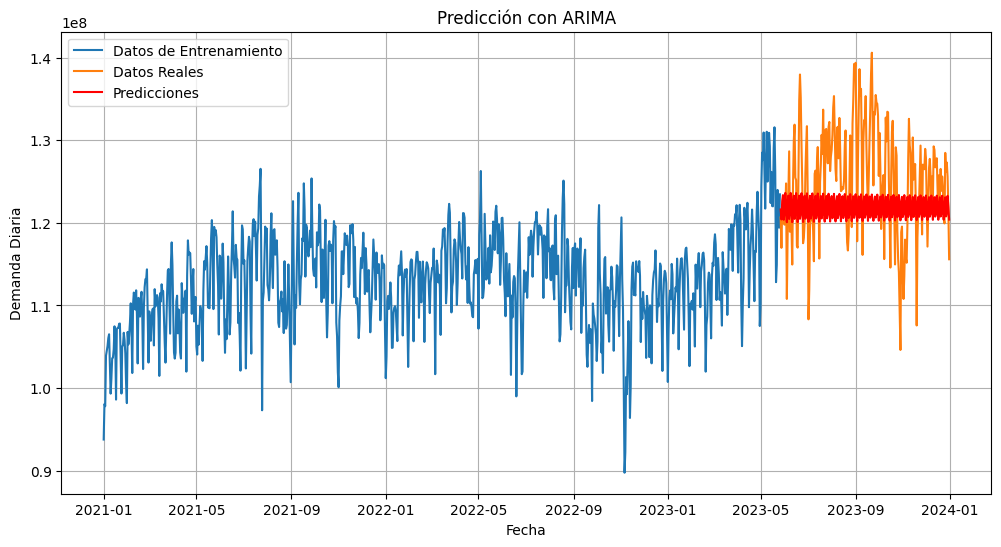

MAE: 5917458.8881072365
MSE: 52573686380176.76
R2: -0.21796983778581436


In [49]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Preparar los datos
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Seleccionar solo la demanda diaria para la serie temporal
demanda_series = data['demanda_diaria']

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
split_index = int(len(demanda_series) * 0.8)
train, test = demanda_series[:split_index], demanda_series[split_index:]

# Ajustar el modelo ARIMA
# Los parámetros p, d, q se deben ajustar según los datos:
# p: número de términos autorregresivos
# d: número de diferencias para hacer la serie estacionaria
# q: número de términos de media móvil
model = ARIMA(train, order=(5, 1, 2))  # Ajuste inicial de p, d, q
model_fit = model.fit()

# Predicción
predictions = model_fit.forecast(steps=len(test))

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(train, label='Datos de Entrenamiento')
plt.plot(test, label='Datos Reales')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Demanda Diaria')
plt.title('Predicción con ARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")
